## Timeframe 1

In [1]:
import pandas as pd
df = pd.read_csv("D:\Project Phase II\Dataset\cleaneddataset.csv",encoding='cp1252')
df = df.drop_duplicates()
start_Stime = 1421927443       
df1 = df[(df['Stime'] >= start_Stime) & (df['Ltime'] <= (start_Stime + 600))]

df1_label_true = df1[df1['Label'] == 1]
df1_label_false = df1[df1['Label'] == 0]
df1_label_false_grouped = df1_label_false.groupby(['srcip', 'sport', 'dstip', 'dsport']).size().reset_index(name='count')
df1_label_true_grouped = df1_label_true.groupby(['srcip', 'sport', 'dstip', 'dsport']).size().reset_index(name='count')
df1_grouped = df1.groupby(['srcip', 'sport', 'dstip', 'dsport']).size().reset_index(name='count')

import networkx as nx
# Create an empty graph
attackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1 = nx.DiGraph()

# Add nodes to the graph
for i in range(len(df1_label_true_grouped)):
    src_node = str(df1_label_true_grouped['srcip'][i]) + ':' + str(df1_label_true_grouped['sport'][i])
    dst_node = str(df1_label_true_grouped['dstip'][i]) + ':' + str(df1_label_true_grouped['dsport'][i])
    attackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1.add_node(src_node)
    attackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1.add_node(dst_node)

# Add edges to the graph with edge weight as count
for i in range(len(df1_label_true_grouped)):
    src_node = str(df1_label_true_grouped['srcip'][i]) + ':' + str(df1_label_true_grouped['sport'][i])
    dst_node = str(df1_label_true_grouped['dstip'][i]) + ':' + str(df1_label_true_grouped['dsport'][i])
    edge_weight = df1_label_true_grouped['count'][i]
    attackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1.add_edge(src_node, dst_node, weight=edge_weight)


import networkx as nx
# Create an empty graph
nonattackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1 = nx.DiGraph()

# Add nodes to the graph
for i in range(len(df1_label_false_grouped)):
    src_node = str(df1_label_false_grouped['srcip'][i]) + ':' + str(df1_label_false_grouped['sport'][i])
    dst_node = str(df1_label_false_grouped['dstip'][i]) + ':' + str(df1_label_false_grouped['dsport'][i])
    nonattackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1.add_node(src_node)
    nonattackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1.add_node(dst_node)

# Add edges to the graph with edge weight as count
for i in range(len(df1_label_false_grouped)):
    src_node = str(df1_label_false_grouped['srcip'][i]) + ':' + str(df1_label_false_grouped['sport'][i])
    dst_node = str(df1_label_false_grouped['dstip'][i]) + ':' + str(df1_label_false_grouped['dsport'][i])
    edge_weight = df1_label_false_grouped['count'][i]
    nonattackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1.add_edge(src_node, dst_node, weight=edge_weight)

import networkx as nx
# Create an empty graph
overallG_10_4_10_3_10_2_10_1_10_2_10_1 = nx.DiGraph()

# Add nodes to the graph
for i in range(len(df1_grouped)):
    src_node = str(df1_grouped['srcip'][i]) + ':' + str(df1_grouped['sport'][i])
    dst_node = str(df1_grouped['dstip'][i]) + ':' + str(df1_grouped['dsport'][i])
    overallG_10_4_10_3_10_2_10_1_10_2_10_1.add_node(src_node)
    overallG_10_4_10_3_10_2_10_1_10_2_10_1.add_node(dst_node)

# Add edges to the graph with edge weight as count
for i in range(len(df1_grouped)):
    src_node = str(df1_grouped['srcip'][i]) + ':' + str(df1_grouped['sport'][i])
    dst_node = str(df1_grouped['dstip'][i]) + ':' + str(df1_grouped['dsport'][i])
    edge_weight = df1_grouped['count'][i]
    overallG_10_4_10_3_10_2_10_1_10_2_10_1.add_edge(src_node, dst_node, weight=edge_weight)


C:\Users\sathi\AppData\Local\Temp\ipykernel_21168\321946155.py:2: DtypeWarning: Columns (1,3,38,46) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("D:\Project Phase II\Dataset\cleaneddataset.csv",encoding='cp1252')


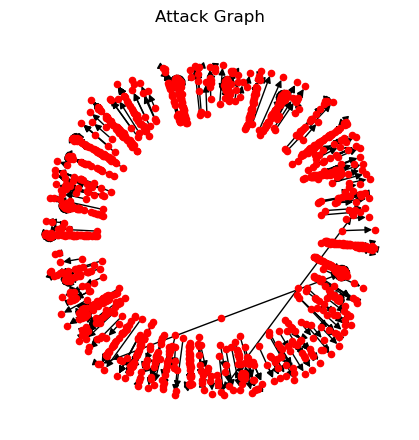

In [2]:
import matplotlib.pyplot as plt

# Draw the graph
plt.figure(figsize=(4,4))
pos = nx.spring_layout(attackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1)
nx.draw(attackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1, pos, with_labels=False, node_size=20, node_color = 'red')
plt.title("Attack Graph")
plt.show()


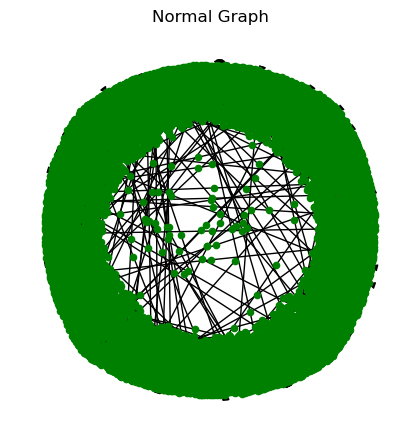

In [3]:
import matplotlib.pyplot as plt

# Draw the graph
plt.figure(figsize=(4,4))
pos = nx.spring_layout(nonattackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1)
nx.draw(nonattackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1, pos, with_labels=False, node_size=20, node_color = 'green')
plt.title("Normal Graph")
plt.show()

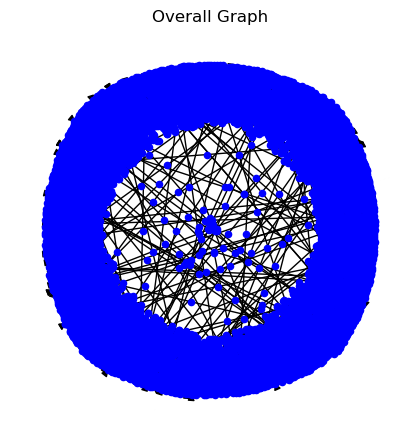

In [6]:
import matplotlib.pyplot as plt

# Draw the graph
plt.figure(figsize=(4,4))
pos = nx.spring_layout(overallG_10_4_10_3_10_2_10_1_10_2_10_1)
nx.draw(overallG_10_4_10_3_10_2_10_1_10_2_10_1, pos, with_labels=False, node_size=20, node_color = 'blue')
plt.title("Overall Graph")
plt.show()

In [4]:
#print the number of nodes and edges in the graph
print("Number of nodes in the attack graph: ", attackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1.number_of_nodes())
print("Number of edges in the attack graph: ", attackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1.number_of_edges())
print("Number of nodes in the non-attack graph: ", nonattackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1.number_of_nodes())
print("Number of edges in the non-attack graph: ", nonattackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1.number_of_edges())
print("Number of nodes in the overall graph: ", overallG_10_4_10_3_10_2_10_1_10_2_10_1.number_of_nodes())
print("Number of edges in the overall graph: ", overallG_10_4_10_3_10_2_10_1_10_2_10_1.number_of_edges())


Number of nodes in the attack graph:  1313
Number of edges in the attack graph:  1137
Number of nodes in the non-attack graph:  17684
Number of edges in the non-attack graph:  14040
Number of nodes in the overall graph:  18985
Number of edges in the overall graph:  15177


In [5]:
# Function to calculate diameter for a graph
def calculate_diameter(G):
    try:
        if nx.is_directed(G):
            # If the graph is directed, we find the largest weakly connected component
            largest_component = max(nx.weakly_connected_components(G), key=len)
            largest_component_subgraph = G.subgraph(largest_component)
        else:
            # For undirected graphs, we find the largest connected component
            largest_component = max(nx.connected_components(G), key=len)
            largest_component_subgraph = G.subgraph(largest_component)
        
        # Calculate the diameter of the largest component
        diameter = nx.diameter(largest_component_subgraph)
    except nx.NetworkXError:
        diameter = None
    return diameter

# Function to calculate reciprocity with error handling
def calculate_reciprocity(G):
    try:
        # Check if the graph is empty
        if len(G) == 0:
            return None  # Return None if the graph is empty
        
        # Calculate reciprocity
        reciprocity = nx.reciprocity(G)
    except nx.NetworkXError:
        reciprocity = None  
    return reciprocity

# Function to detect communities using the greedy modularity algorithm
def detect_communities(G):
    try:
        # Check if the graph has edges
        if G.size() == 0:
            return 0  # Return 0 communities if the graph is empty
        
        # Detect communities using the greedy modularity algorithm
        communities = list(nx.algorithms.community.greedy_modularity_communities(G))
        num_communities = len(communities)
    except ZeroDivisionError:
        num_communities = 0  # Return 0 communities if a division by zero error occurs
    return num_communities





# 1. Assortativity coefficient
assortativity_attack = nx.degree_assortativity_coefficient(attackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1)
assortativity_non_attack = nx.degree_assortativity_coefficient(nonattackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1)
assortativity_overall = nx.degree_assortativity_coefficient(overallG_10_4_10_3_10_2_10_1_10_2_10_1)

print("Assortativity coefficient for attack graph:", assortativity_attack)
print("Assortativity coefficient for non-attack graph:", assortativity_non_attack)
print("Assortativity coefficient for overall graph:", assortativity_overall)

# 2. Average betweenness centrality
avg_betweenness_attack = sum(nx.betweenness_centrality(attackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1).values()) / len(attackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1)
avg_betweenness_non_attack = sum(nx.betweenness_centrality(nonattackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1).values()) / len(nonattackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1)
avg_betweenness_overall = sum(nx.betweenness_centrality(overallG_10_4_10_3_10_2_10_1_10_2_10_1).values()) / len(overallG_10_4_10_3_10_2_10_1_10_2_10_1)

print("Average betweenness centrality for attack graph:", avg_betweenness_attack)
print("Average betweenness centrality for non-attack graph:", avg_betweenness_non_attack)
print("Average betweenness centrality for overall graph:", avg_betweenness_overall)

# 3. Average closeness centrality
avg_closeness_attack = sum(nx.closeness_centrality(attackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1).values()) / len(attackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1)
avg_closeness_non_attack = sum(nx.closeness_centrality(nonattackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1).values()) / len(nonattackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1)
avg_closeness_overall = sum(nx.closeness_centrality(overallG_10_4_10_3_10_2_10_1_10_2_10_1).values()) / len(overallG_10_4_10_3_10_2_10_1_10_2_10_1)

print("Average closeness centrality for attack graph:", avg_closeness_attack)
print("Average closeness centrality for non-attack graph:", avg_closeness_non_attack)
print("Average closeness centrality for overall graph:", avg_closeness_overall)

# 4. Average clustering coefficient
avg_clustering_attack = nx.average_clustering(attackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1)
avg_clustering_non_attack = nx.average_clustering(nonattackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1)
avg_clustering_overall = nx.average_clustering(overallG_10_4_10_3_10_2_10_1_10_2_10_1)

print("Average clustering coefficient for attack graph:", avg_clustering_attack)
print("Average clustering coefficient for non-attack graph:", avg_clustering_non_attack)
print("Average clustering coefficient for overall graph:", avg_clustering_overall)

# 5. Average degree
avg_degree_attack = sum(dict(attackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1.degree()).values()) / len(attackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1)
avg_degree_non_attack = sum(dict(nonattackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1.degree()).values()) / len(nonattackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1)
avg_degree_overall = sum(dict(overallG_10_4_10_3_10_2_10_1_10_2_10_1.degree()).values()) / len(overallG_10_4_10_3_10_2_10_1_10_2_10_1)

print("Average degree for attack graph:", avg_degree_attack)
print("Average degree for non-attack graph:", avg_degree_non_attack)
print("Average degree for overall graph:", avg_degree_overall)

# 6. Average degree centrality
avg_degree_centrality_attack = sum(nx.degree_centrality(attackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1).values()) / len(attackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1)
avg_degree_centrality_non_attack = sum(nx.degree_centrality(nonattackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1).values()) / len(nonattackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1)
avg_degree_centrality_overall = sum(nx.degree_centrality(overallG_10_4_10_3_10_2_10_1_10_2_10_1).values()) / len(overallG_10_4_10_3_10_2_10_1_10_2_10_1)

print("Average degree centrality for attack graph:", avg_degree_centrality_attack)
print("Average degree centrality for non-attack graph:", avg_degree_centrality_non_attack)
print("Average degree centrality for overall graph:", avg_degree_centrality_overall)

# 7. Average eigenvector centrality
avg_eigenvector_attack = sum(nx.eigenvector_centrality_numpy(attackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1).values()) / len(attackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1)
avg_eigenvector_non_attack = sum(nx.eigenvector_centrality_numpy(nonattackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1).values()) / len(nonattackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1)
avg_eigenvector_overall = sum(nx.eigenvector_centrality_numpy(overallG_10_4_10_3_10_2_10_1_10_2_10_1).values()) / len(overallG_10_4_10_3_10_2_10_1_10_2_10_1)

print("Average eigenvector centrality for attack graph:", avg_eigenvector_attack)
print("Average eigenvector centrality for non-attack graph:", avg_eigenvector_non_attack)
print("Average eigenvector centrality for overall graph:", avg_eigenvector_overall)

# 8. Average in-degree
avg_in_degree_attack = sum(dict(attackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1.in_degree()).values()) / len(attackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1)
avg_in_degree_non_attack = sum(dict(nonattackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1.in_degree()).values()) / len(nonattackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1)
avg_in_degree_overall = sum(dict(overallG_10_4_10_3_10_2_10_1_10_2_10_1.in_degree()).values()) / len(overallG_10_4_10_3_10_2_10_1_10_2_10_1)

print("Average in-degree for attack graph:", avg_in_degree_attack)
print("Average in-degree for non-attack graph:", avg_in_degree_non_attack)
print("Average in-degree for overall graph:", avg_in_degree_overall)

# 9. Average out-degree
avg_out_degree_attack = sum(dict(attackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1.out_degree()).values()) / len(attackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1)
avg_out_degree_non_attack = sum(dict(nonattackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1.out_degree()).values()) / len(nonattackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1)
avg_out_degree_overall = sum(dict(overallG_10_4_10_3_10_2_10_1_10_2_10_1.out_degree()).values()) / len(overallG_10_4_10_3_10_2_10_1_10_2_10_1)

print("Average out-degree for attack graph:", avg_out_degree_attack)
print("Average out-degree for non-attack graph:", avg_out_degree_non_attack)
print("Average out-degree for overall graph:", avg_out_degree_overall)

# 10. Average PageRank score
avg_pagerank_attack = sum(nx.pagerank(attackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1).values()) / len(attackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1)
avg_pagerank_non_attack = sum(nx.pagerank(nonattackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1).values()) / len(nonattackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1)
avg_pagerank_overall = sum(nx.pagerank(overallG_10_4_10_3_10_2_10_1_10_2_10_1).values()) / len(overallG_10_4_10_3_10_2_10_1_10_2_10_1)

print("Average PageRank score for attack graph:", avg_pagerank_attack)
print("Average PageRank score for non-attack graph:", avg_pagerank_non_attack)
print("Average PageRank score for overall graph:", avg_pagerank_overall)



# 11. Average shortest path length
avg_shortest_path_attack = calculate_diameter(attackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1)
avg_shortest_path_non_attack = calculate_diameter(nonattackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1)
avg_shortest_path_overall = calculate_diameter(overallG_10_4_10_3_10_2_10_1_10_2_10_1)

print("Average shortest path length for attack graph:", avg_shortest_path_attack)
print("Average shortest path length for non-attack graph:", avg_shortest_path_non_attack)
print("Average shortest path length for overall graph:", avg_shortest_path_overall)


# 12. Density
density_attack = nx.density(attackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1)
density_non_attack = nx.density(nonattackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1)
density_overall = nx.density(overallG_10_4_10_3_10_2_10_1_10_2_10_1)

print("Density for attack graph:", density_attack)
print("Density for non-attack graph:", density_non_attack)
print("Density for overall graph:", density_overall)

# 13. Diameter
diameter_attack = calculate_diameter(attackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1)
diameter_non_attack = calculate_diameter(nonattackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1)
diameter_overall = calculate_diameter(overallG_10_4_10_3_10_2_10_1_10_2_10_1)

print("Diameter for attack graph:", diameter_attack)
print("Diameter for non-attack graph:", diameter_non_attack)
print("Diameter for overall graph:", diameter_overall)


# 14. Number of Louvain communities detected
num_louvain_attack = detect_communities(attackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1)
num_louvain_non_attack = detect_communities(nonattackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1)
num_louvain_overall = detect_communities(overallG_10_4_10_3_10_2_10_1_10_2_10_1)

print("Number of Louvain communities detected in attack graph:", num_louvain_attack)
print("Number of Louvain communities detected in non-attack graph:", num_louvain_non_attack)
print("Number of Louvain communities detected in overall graph:", num_louvain_overall)

# 15. Number of strongly connected components
num_strongly_connected_attack = nx.number_strongly_connected_components(attackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1)
num_strongly_connected_non_attack = nx.number_strongly_connected_components(nonattackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1)
num_strongly_connected_overall = nx.number_strongly_connected_components(overallG_10_4_10_3_10_2_10_1_10_2_10_1)

print("Number of strongly connected components in attack graph:", num_strongly_connected_attack)
print("Number of strongly connected components in non-attack graph:", num_strongly_connected_non_attack)
print("Number of strongly connected components in overall graph:", num_strongly_connected_overall)

# 16. Number of weakly connected components
num_weakly_connected_attack = nx.number_weakly_connected_components(attackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1)
num_weakly_connected_non_attack = nx.number_weakly_connected_components(nonattackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1)
num_weakly_connected_overall = nx.number_weakly_connected_components(overallG_10_4_10_3_10_2_10_1_10_2_10_1)

print("Number of weakly connected components in attack graph:", num_weakly_connected_attack)
print("Number of weakly connected components in non-attack graph:", num_weakly_connected_non_attack)
print("Number of weakly connected components in overall graph:", num_weakly_connected_overall)




reciprocity_attack = calculate_reciprocity(attackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1)
reciprocity_non_attack = calculate_reciprocity(nonattackG_10_4_10_3_10_2_10_1_10_1_10_2_10_1_10_1)
reciprocity_overall = calculate_reciprocity(overallG_10_4_10_3_10_2_10_1_10_2_10_1)

print("Reciprocity for attack graph:", reciprocity_attack)
print("Reciprocity for non-attack graph:", reciprocity_non_attack)
print("Reciprocity for overall graph:", reciprocity_overall)

Assortativity coefficient for attack graph: -0.024774727285235675
Assortativity coefficient for non-attack graph: -0.004734935299806067
Assortativity coefficient for overall graph: -0.0012147406034415723
Average betweenness centrality for attack graph: 0.0
Average betweenness centrality for non-attack graph: 3.617113664367776e-13
Average betweenness centrality for overall graph: 2.9232558081299413e-13
Average closeness centrality for attack graph: 0.0006600273066706266
Average closeness centrality for non-attack graph: 4.490024371290998e-05
Average closeness centrality for overall graph: 4.211184793607937e-05
Average clustering coefficient for attack graph: 0.0
Average clustering coefficient for non-attack graph: 0.0
Average clustering coefficient for overall graph: 0.0
Average degree for attack graph: 1.731911652703732
Average degree for non-attack graph: 1.5878760461434065
Average degree for overall graph: 1.5988411904134843
Average degree centrality for attack graph: 0.0013200546133

## Timeframe 2

In [6]:
start_Stime = 1421927444    
df1 = df[(df['Stime'] >= start_Stime) & (df['Ltime'] <= (start_Stime + 600))]

df1_label_true = df1[df1['Label'] == 1]
df1_label_false = df1[df1['Label'] == 0]
df1_label_false_grouped = df1_label_false.groupby(['srcip', 'sport', 'dstip', 'dsport']).size().reset_index(name='count')
df1_label_true_grouped = df1_label_true.groupby(['srcip', 'sport', 'dstip', 'dsport']).size().reset_index(name='count')
df1_grouped = df1.groupby(['srcip', 'sport', 'dstip', 'dsport']).size().reset_index(name='count')

import networkx as nx
# Create an empty graph
attackG_10_4_10_3_10_2_10_1 = nx.DiGraph()

# Add nodes to the graph
for i in range(len(df1_label_true_grouped)):
    src_node = str(df1_label_true_grouped['srcip'][i]) + ':' + str(df1_label_true_grouped['sport'][i])
    dst_node = str(df1_label_true_grouped['dstip'][i]) + ':' + str(df1_label_true_grouped['dsport'][i])
    attackG_10_4_10_3_10_2_10_1.add_node(src_node)
    attackG_10_4_10_3_10_2_10_1.add_node(dst_node)

# Add edges to the graph with edge weight as count
for i in range(len(df1_label_true_grouped)):
    src_node = str(df1_label_true_grouped['srcip'][i]) + ':' + str(df1_label_true_grouped['sport'][i])
    dst_node = str(df1_label_true_grouped['dstip'][i]) + ':' + str(df1_label_true_grouped['dsport'][i])
    edge_weight = df1_label_true_grouped['count'][i]
    attackG_10_4_10_3_10_2_10_1.add_edge(src_node, dst_node, weight=edge_weight)


import networkx as nx
# Create an empty graph
nonattackG_10_4_10_3_10_2_10_1 = nx.DiGraph()

# Add nodes to the graph
for i in range(len(df1_label_false_grouped)):
    src_node = str(df1_label_false_grouped['srcip'][i]) + ':' + str(df1_label_false_grouped['sport'][i])
    dst_node = str(df1_label_false_grouped['dstip'][i]) + ':' + str(df1_label_false_grouped['dsport'][i])
    nonattackG_10_4_10_3_10_2_10_1.add_node(src_node)
    nonattackG_10_4_10_3_10_2_10_1.add_node(dst_node)

# Add edges to the graph with edge weight as count
for i in range(len(df1_label_false_grouped)):
    src_node = str(df1_label_false_grouped['srcip'][i]) + ':' + str(df1_label_false_grouped['sport'][i])
    dst_node = str(df1_label_false_grouped['dstip'][i]) + ':' + str(df1_label_false_grouped['dsport'][i])
    edge_weight = df1_label_false_grouped['count'][i]
    nonattackG_10_4_10_3_10_2_10_1.add_edge(src_node, dst_node, weight=edge_weight)

import networkx as nx
# Create an empty graph
overallG_10_4_10_3_10_2_10_1 = nx.DiGraph()

# Add nodes to the graph
for i in range(len(df1_grouped)):
    src_node = str(df1_grouped['srcip'][i]) + ':' + str(df1_grouped['sport'][i])
    dst_node = str(df1_grouped['dstip'][i]) + ':' + str(df1_grouped['dsport'][i])
    overallG_10_4_10_3_10_2_10_1.add_node(src_node)
    overallG_10_4_10_3_10_2_10_1.add_node(dst_node)

# Add edges to the graph with edge weight as count
for i in range(len(df1_grouped)):
    src_node = str(df1_grouped['srcip'][i]) + ':' + str(df1_grouped['sport'][i])
    dst_node = str(df1_grouped['dstip'][i]) + ':' + str(df1_grouped['dsport'][i])
    edge_weight = df1_grouped['count'][i]
    overallG_10_4_10_3_10_2_10_1.add_edge(src_node, dst_node, weight=edge_weight)

In [7]:
#print the number of nodes and edges of the graph
print("Number of nodes in the attack graph: ", attackG_10_4_10_3_10_2_10_1.number_of_nodes())
print("Number of edges in the attack graph: ", attackG_10_4_10_3_10_2_10_1.number_of_edges())
print("Number of nodes in the non-attack graph: ", nonattackG_10_4_10_3_10_2_10_1.number_of_nodes())
print("Number of edges in the non-attack graph: ", nonattackG_10_4_10_3_10_2_10_1.number_of_edges())
print("Number of nodes in the overall graph: ", overallG_10_4_10_3_10_2_10_1.number_of_nodes())
print("Number of edges in the overall graph: ", overallG_10_4_10_3_10_2_10_1.number_of_edges())

Number of nodes in the attack graph:  1316
Number of edges in the attack graph:  1139
Number of nodes in the non-attack graph:  17296
Number of edges in the non-attack graph:  13639
Number of nodes in the overall graph:  18600
Number of edges in the overall graph:  14778


In [8]:
# Function to calculate diameter for a graph
def calculate_diameter(G):
    try:
        if nx.is_directed(G):
            # If the graph is directed, we find the largest weakly connected component
            largest_component = max(nx.weakly_connected_components(G), key=len)
            largest_component_subgraph = G.subgraph(largest_component)
        else:
            # For undirected graphs, we find the largest connected component
            largest_component = max(nx.connected_components(G), key=len)
            largest_component_subgraph = G.subgraph(largest_component)
        
        # Calculate the diameter of the largest component
        diameter = nx.diameter(largest_component_subgraph)
    except nx.NetworkXError:
        diameter = None
    return diameter

# Function to calculate reciprocity with error handling
def calculate_reciprocity(G):
    try:
        # Check if the graph is empty
        if len(G) == 0:
            return None  # Return None if the graph is empty
        
        # Calculate reciprocity
        reciprocity = nx.reciprocity(G)
    except nx.NetworkXError:
        reciprocity = None  
    return reciprocity

# Function to detect communities using the greedy modularity algorithm
def detect_communities(G):
    try:
        # Check if the graph has edges
        if G.size() == 0:
            return 0  # Return 0 communities if the graph is empty
        
        # Detect communities using the greedy modularity algorithm
        communities = list(nx.algorithms.community.greedy_modularity_communities(G))
        num_communities = len(communities)
    except ZeroDivisionError:
        num_communities = 0  # Return 0 communities if a division by zero error occurs
    return num_communities





# 1. Assortativity coefficient
assortativity_attack = nx.degree_assortativity_coefficient(attackG_10_4_10_3_10_2_10_1)
assortativity_non_attack = nx.degree_assortativity_coefficient(nonattackG_10_4_10_3_10_2_10_1)
assortativity_overall = nx.degree_assortativity_coefficient(overallG_10_4_10_3_10_2_10_1)

print("Assortativity coefficient for attack graph:", assortativity_attack)
print("Assortativity coefficient for non-attack graph:", assortativity_non_attack)
print("Assortativity coefficient for overall graph:", assortativity_overall)

# 2. Average betweenness centrality
avg_betweenness_attack = sum(nx.betweenness_centrality(attackG_10_4_10_3_10_2_10_1).values()) / len(attackG_10_4_10_3_10_2_10_1)
avg_betweenness_non_attack = sum(nx.betweenness_centrality(nonattackG_10_4_10_3_10_2_10_1).values()) / len(nonattackG_10_4_10_3_10_2_10_1)
avg_betweenness_overall = sum(nx.betweenness_centrality(overallG_10_4_10_3_10_2_10_1).values()) / len(overallG_10_4_10_3_10_2_10_1)

print("Average betweenness centrality for attack graph:", avg_betweenness_attack)
print("Average betweenness centrality for non-attack graph:", avg_betweenness_non_attack)
print("Average betweenness centrality for overall graph:", avg_betweenness_overall)

# 3. Average closeness centrality
avg_closeness_attack = sum(nx.closeness_centrality(attackG_10_4_10_3_10_2_10_1).values()) / len(attackG_10_4_10_3_10_2_10_1)
avg_closeness_non_attack = sum(nx.closeness_centrality(nonattackG_10_4_10_3_10_2_10_1).values()) / len(nonattackG_10_4_10_3_10_2_10_1)
avg_closeness_overall = sum(nx.closeness_centrality(overallG_10_4_10_3_10_2_10_1).values()) / len(overallG_10_4_10_3_10_2_10_1)

print("Average closeness centrality for attack graph:", avg_closeness_attack)
print("Average closeness centrality for non-attack graph:", avg_closeness_non_attack)
print("Average closeness centrality for overall graph:", avg_closeness_overall)

# 4. Average clustering coefficient
avg_clustering_attack = nx.average_clustering(attackG_10_4_10_3_10_2_10_1)
avg_clustering_non_attack = nx.average_clustering(nonattackG_10_4_10_3_10_2_10_1)
avg_clustering_overall = nx.average_clustering(overallG_10_4_10_3_10_2_10_1)

print("Average clustering coefficient for attack graph:", avg_clustering_attack)
print("Average clustering coefficient for non-attack graph:", avg_clustering_non_attack)
print("Average clustering coefficient for overall graph:", avg_clustering_overall)

# 5. Average degree
avg_degree_attack = sum(dict(attackG_10_4_10_3_10_2_10_1.degree()).values()) / len(attackG_10_4_10_3_10_2_10_1)
avg_degree_non_attack = sum(dict(nonattackG_10_4_10_3_10_2_10_1.degree()).values()) / len(nonattackG_10_4_10_3_10_2_10_1)
avg_degree_overall = sum(dict(overallG_10_4_10_3_10_2_10_1.degree()).values()) / len(overallG_10_4_10_3_10_2_10_1)

print("Average degree for attack graph:", avg_degree_attack)
print("Average degree for non-attack graph:", avg_degree_non_attack)
print("Average degree for overall graph:", avg_degree_overall)

# 6. Average degree centrality
avg_degree_centrality_attack = sum(nx.degree_centrality(attackG_10_4_10_3_10_2_10_1).values()) / len(attackG_10_4_10_3_10_2_10_1)
avg_degree_centrality_non_attack = sum(nx.degree_centrality(nonattackG_10_4_10_3_10_2_10_1).values()) / len(nonattackG_10_4_10_3_10_2_10_1)
avg_degree_centrality_overall = sum(nx.degree_centrality(overallG_10_4_10_3_10_2_10_1).values()) / len(overallG_10_4_10_3_10_2_10_1)

print("Average degree centrality for attack graph:", avg_degree_centrality_attack)
print("Average degree centrality for non-attack graph:", avg_degree_centrality_non_attack)
print("Average degree centrality for overall graph:", avg_degree_centrality_overall)

# 7. Average eigenvector centrality
avg_eigenvector_attack = sum(nx.eigenvector_centrality_numpy(attackG_10_4_10_3_10_2_10_1).values()) / len(attackG_10_4_10_3_10_2_10_1)
avg_eigenvector_non_attack = sum(nx.eigenvector_centrality_numpy(nonattackG_10_4_10_3_10_2_10_1).values()) / len(nonattackG_10_4_10_3_10_2_10_1)
avg_eigenvector_overall = sum(nx.eigenvector_centrality_numpy(overallG_10_4_10_3_10_2_10_1).values()) / len(overallG_10_4_10_3_10_2_10_1)

print("Average eigenvector centrality for attack graph:", avg_eigenvector_attack)
print("Average eigenvector centrality for non-attack graph:", avg_eigenvector_non_attack)
print("Average eigenvector centrality for overall graph:", avg_eigenvector_overall)

# 8. Average in-degree
avg_in_degree_attack = sum(dict(attackG_10_4_10_3_10_2_10_1.in_degree()).values()) / len(attackG_10_4_10_3_10_2_10_1)
avg_in_degree_non_attack = sum(dict(nonattackG_10_4_10_3_10_2_10_1.in_degree()).values()) / len(nonattackG_10_4_10_3_10_2_10_1)
avg_in_degree_overall = sum(dict(overallG_10_4_10_3_10_2_10_1.in_degree()).values()) / len(overallG_10_4_10_3_10_2_10_1)

print("Average in-degree for attack graph:", avg_in_degree_attack)
print("Average in-degree for non-attack graph:", avg_in_degree_non_attack)
print("Average in-degree for overall graph:", avg_in_degree_overall)

# 9. Average out-degree
avg_out_degree_attack = sum(dict(attackG_10_4_10_3_10_2_10_1.out_degree()).values()) / len(attackG_10_4_10_3_10_2_10_1)
avg_out_degree_non_attack = sum(dict(nonattackG_10_4_10_3_10_2_10_1.out_degree()).values()) / len(nonattackG_10_4_10_3_10_2_10_1)
avg_out_degree_overall = sum(dict(overallG_10_4_10_3_10_2_10_1.out_degree()).values()) / len(overallG_10_4_10_3_10_2_10_1)

print("Average out-degree for attack graph:", avg_out_degree_attack)
print("Average out-degree for non-attack graph:", avg_out_degree_non_attack)
print("Average out-degree for overall graph:", avg_out_degree_overall)

# 10. Average PageRank score
avg_pagerank_attack = sum(nx.pagerank(attackG_10_4_10_3_10_2_10_1).values()) / len(attackG_10_4_10_3_10_2_10_1)
avg_pagerank_non_attack = sum(nx.pagerank(nonattackG_10_4_10_3_10_2_10_1).values()) / len(nonattackG_10_4_10_3_10_2_10_1)
avg_pagerank_overall = sum(nx.pagerank(overallG_10_4_10_3_10_2_10_1).values()) / len(overallG_10_4_10_3_10_2_10_1)

print("Average PageRank score for attack graph:", avg_pagerank_attack)
print("Average PageRank score for non-attack graph:", avg_pagerank_non_attack)
print("Average PageRank score for overall graph:", avg_pagerank_overall)



# 11. Average shortest path length
avg_shortest_path_attack = calculate_diameter(attackG_10_4_10_3_10_2_10_1)
avg_shortest_path_non_attack = calculate_diameter(nonattackG_10_4_10_3_10_2_10_1)
avg_shortest_path_overall = calculate_diameter(overallG_10_4_10_3_10_2_10_1)

print("Average shortest path length for attack graph:", avg_shortest_path_attack)
print("Average shortest path length for non-attack graph:", avg_shortest_path_non_attack)
print("Average shortest path length for overall graph:", avg_shortest_path_overall)


# 12. Density
density_attack = nx.density(attackG_10_4_10_3_10_2_10_1)
density_non_attack = nx.density(nonattackG_10_4_10_3_10_2_10_1)
density_overall = nx.density(overallG_10_4_10_3_10_2_10_1)

print("Density for attack graph:", density_attack)
print("Density for non-attack graph:", density_non_attack)
print("Density for overall graph:", density_overall)

# 13. Diameter
diameter_attack = calculate_diameter(attackG_10_4_10_3_10_2_10_1)
diameter_non_attack = calculate_diameter(nonattackG_10_4_10_3_10_2_10_1)
diameter_overall = calculate_diameter(overallG_10_4_10_3_10_2_10_1)

print("Diameter for attack graph:", diameter_attack)
print("Diameter for non-attack graph:", diameter_non_attack)
print("Diameter for overall graph:", diameter_overall)


# 14. Number of Louvain communities detected
num_louvain_attack = detect_communities(attackG_10_4_10_3_10_2_10_1)
num_louvain_non_attack = detect_communities(nonattackG_10_4_10_3_10_2_10_1)
num_louvain_overall = detect_communities(overallG_10_4_10_3_10_2_10_1)

print("Number of Louvain communities detected in attack graph:", num_louvain_attack)
print("Number of Louvain communities detected in non-attack graph:", num_louvain_non_attack)
print("Number of Louvain communities detected in overall graph:", num_louvain_overall)

# 15. Number of strongly connected components
num_strongly_connected_attack = nx.number_strongly_connected_components(attackG_10_4_10_3_10_2_10_1)
num_strongly_connected_non_attack = nx.number_strongly_connected_components(nonattackG_10_4_10_3_10_2_10_1)
num_strongly_connected_overall = nx.number_strongly_connected_components(overallG_10_4_10_3_10_2_10_1)

print("Number of strongly connected components in attack graph:", num_strongly_connected_attack)
print("Number of strongly connected components in non-attack graph:", num_strongly_connected_non_attack)
print("Number of strongly connected components in overall graph:", num_strongly_connected_overall)

# 16. Number of weakly connected components
num_weakly_connected_attack = nx.number_weakly_connected_components(attackG_10_4_10_3_10_2_10_1)
num_weakly_connected_non_attack = nx.number_weakly_connected_components(nonattackG_10_4_10_3_10_2_10_1)
num_weakly_connected_overall = nx.number_weakly_connected_components(overallG_10_4_10_3_10_2_10_1)

print("Number of weakly connected components in attack graph:", num_weakly_connected_attack)
print("Number of weakly connected components in non-attack graph:", num_weakly_connected_non_attack)
print("Number of weakly connected components in overall graph:", num_weakly_connected_overall)




reciprocity_attack = calculate_reciprocity(attackG_10_4_10_3_10_2_10_1)
reciprocity_non_attack = calculate_reciprocity(nonattackG_10_4_10_3_10_2_10_1)
reciprocity_overall = calculate_reciprocity(overallG_10_4_10_3_10_2_10_1)

print("Reciprocity for attack graph:", reciprocity_attack)
print("Reciprocity for non-attack graph:", reciprocity_non_attack)
print("Reciprocity for overall graph:", reciprocity_overall)

Assortativity coefficient for attack graph: -0.024107417535121495
Assortativity coefficient for non-attack graph: -0.006882868190589801
Assortativity coefficient for overall graph: -0.003634590981980655
Average betweenness centrality for attack graph: 0.0
Average betweenness centrality for non-attack graph: 3.866057402507164e-13
Average betweenness centrality for overall graph: 3.1085740242158176e-13
Average closeness centrality for attack graph: 0.0006581760606515913
Average closeness centrality for non-attack graph: 4.559685205407525e-05
Average closeness centrality for overall graph: 4.271990381415429e-05
Average clustering coefficient for attack graph: 0.0
Average clustering coefficient for non-attack graph: 0.0
Average clustering coefficient for overall graph: 0.0
Average degree for attack graph: 1.7310030395136777
Average degree for non-attack graph: 1.577127659574468
Average degree for overall graph: 1.5890322580645162
Average degree centrality for attack graph: 0.00131635212130

## Timeframe 3

In [9]:
start_Stime = 1421927644       
df1 = df[(df['Stime'] >= start_Stime) & (df['Ltime'] <= (start_Stime + 600))]

df1_label_true = df1[df1['Label'] == 1]
df1_label_false = df1[df1['Label'] == 0]
df1_label_false_grouped = df1_label_false.groupby(['srcip', 'sport', 'dstip', 'dsport']).size().reset_index(name='count')
df1_label_true_grouped = df1_label_true.groupby(['srcip', 'sport', 'dstip', 'dsport']).size().reset_index(name='count')
df1_grouped = df1.groupby(['srcip', 'sport', 'dstip', 'dsport']).size().reset_index(name='count')

import networkx as nx
# Create an empty graph
attackG_10_4_10_3 = nx.DiGraph()

# Add nodes to the graph
for i in range(len(df1_label_true_grouped)):
    src_node = str(df1_label_true_grouped['srcip'][i]) + ':' + str(df1_label_true_grouped['sport'][i])
    dst_node = str(df1_label_true_grouped['dstip'][i]) + ':' + str(df1_label_true_grouped['dsport'][i])
    attackG_10_4_10_3.add_node(src_node)
    attackG_10_4_10_3.add_node(dst_node)

# Add edges to the graph with edge weight as count
for i in range(len(df1_label_true_grouped)):
    src_node = str(df1_label_true_grouped['srcip'][i]) + ':' + str(df1_label_true_grouped['sport'][i])
    dst_node = str(df1_label_true_grouped['dstip'][i]) + ':' + str(df1_label_true_grouped['dsport'][i])
    edge_weight = df1_label_true_grouped['count'][i]
    attackG_10_4_10_3.add_edge(src_node, dst_node, weight=edge_weight)


import networkx as nx
# Create an empty graph
nonattackG_10_4_10_3 = nx.DiGraph()

# Add nodes to the graph
for i in range(len(df1_label_false_grouped)):
    src_node = str(df1_label_false_grouped['srcip'][i]) + ':' + str(df1_label_false_grouped['sport'][i])
    dst_node = str(df1_label_false_grouped['dstip'][i]) + ':' + str(df1_label_false_grouped['dsport'][i])
    nonattackG_10_4_10_3.add_node(src_node)
    nonattackG_10_4_10_3.add_node(dst_node)

# Add edges to the graph with edge weight as count
for i in range(len(df1_label_false_grouped)):
    src_node = str(df1_label_false_grouped['srcip'][i]) + ':' + str(df1_label_false_grouped['sport'][i])
    dst_node = str(df1_label_false_grouped['dstip'][i]) + ':' + str(df1_label_false_grouped['dsport'][i])
    edge_weight = df1_label_false_grouped['count'][i]
    nonattackG_10_4_10_3.add_edge(src_node, dst_node, weight=edge_weight)

import networkx as nx
# Create an empty graph
overallG_10_4_10_3 = nx.DiGraph()

# Add nodes to the graph
for i in range(len(df1_grouped)):
    src_node = str(df1_grouped['srcip'][i]) + ':' + str(df1_grouped['sport'][i])
    dst_node = str(df1_grouped['dstip'][i]) + ':' + str(df1_grouped['dsport'][i])
    overallG_10_4_10_3.add_node(src_node)
    overallG_10_4_10_3.add_node(dst_node)

# Add edges to the graph with edge weight as count
for i in range(len(df1_grouped)):
    src_node = str(df1_grouped['srcip'][i]) + ':' + str(df1_grouped['sport'][i])
    dst_node = str(df1_grouped['dstip'][i]) + ':' + str(df1_grouped['dsport'][i])
    edge_weight = df1_grouped['count'][i]
    overallG_10_4_10_3.add_edge(src_node, dst_node, weight=edge_weight)

In [10]:
#print the number of nodes and edges in the graph
print("Number of nodes in the attack graph: ", attackG_10_4_10_3.number_of_nodes())
print("Number of edges in the attack graph: ", attackG_10_4_10_3.number_of_edges())
print("Number of nodes in the non-attack graph: ", nonattackG_10_4_10_3.number_of_nodes())
print("Number of edges in the non-attack graph: ", nonattackG_10_4_10_3.number_of_edges())
print("Number of nodes in the overall graph: ", overallG_10_4_10_3.number_of_nodes())
print("Number of edges in the overall graph: ", overallG_10_4_10_3.number_of_edges())


Number of nodes in the attack graph:  1419
Number of edges in the attack graph:  1249
Number of nodes in the non-attack graph:  17735
Number of edges in the non-attack graph:  14112
Number of nodes in the overall graph:  19137
Number of edges in the overall graph:  15361


In [11]:
# Function to calculate diameter for a graph
def calculate_diameter(G):
    try:
        if nx.is_directed(G):
            # If the graph is directed, we find the largest weakly connected component
            largest_component = max(nx.weakly_connected_components(G), key=len)
            largest_component_subgraph = G.subgraph(largest_component)
        else:
            # For undirected graphs, we find the largest connected component
            largest_component = max(nx.connected_components(G), key=len)
            largest_component_subgraph = G.subgraph(largest_component)
        
        # Calculate the diameter of the largest component
        diameter = nx.diameter(largest_component_subgraph)
    except nx.NetworkXError:
        diameter = None
    return diameter

# Function to calculate reciprocity with error handling
def calculate_reciprocity(G):
    try:
        # Check if the graph is empty
        if len(G) == 0:
            return None  # Return None if the graph is empty
        
        # Calculate reciprocity
        reciprocity = nx.reciprocity(G)
    except nx.NetworkXError:
        reciprocity = None  
    return reciprocity

# Function to detect communities using the greedy modularity algorithm
def detect_communities(G):
    try:
        # Check if the graph has edges
        if G.size() == 0:
            return 0  # Return 0 communities if the graph is empty
        
        # Detect communities using the greedy modularity algorithm
        communities = list(nx.algorithms.community.greedy_modularity_communities(G))
        num_communities = len(communities)
    except ZeroDivisionError:
        num_communities = 0  # Return 0 communities if a division by zero error occurs
    return num_communities





# 1. Assortativity coefficient
assortativity_attack = nx.degree_assortativity_coefficient(attackG_10_4_10_3)
assortativity_non_attack = nx.degree_assortativity_coefficient(nonattackG_10_4_10_3)
assortativity_overall = nx.degree_assortativity_coefficient(overallG_10_4_10_3)

print("Assortativity coefficient for attack graph:", assortativity_attack)
print("Assortativity coefficient for non-attack graph:", assortativity_non_attack)
print("Assortativity coefficient for overall graph:", assortativity_overall)

# 2. Average betweenness centrality
avg_betweenness_attack = sum(nx.betweenness_centrality(attackG_10_4_10_3).values()) / len(attackG_10_4_10_3)
avg_betweenness_non_attack = sum(nx.betweenness_centrality(nonattackG_10_4_10_3).values()) / len(nonattackG_10_4_10_3)
avg_betweenness_overall = sum(nx.betweenness_centrality(overallG_10_4_10_3).values()) / len(overallG_10_4_10_3)

print("Average betweenness centrality for attack graph:", avg_betweenness_attack)
print("Average betweenness centrality for non-attack graph:", avg_betweenness_non_attack)
print("Average betweenness centrality for overall graph:", avg_betweenness_overall)

# 3. Average closeness centrality
avg_closeness_attack = sum(nx.closeness_centrality(attackG_10_4_10_3).values()) / len(attackG_10_4_10_3)
avg_closeness_non_attack = sum(nx.closeness_centrality(nonattackG_10_4_10_3).values()) / len(nonattackG_10_4_10_3)
avg_closeness_overall = sum(nx.closeness_centrality(overallG_10_4_10_3).values()) / len(overallG_10_4_10_3)

print("Average closeness centrality for attack graph:", avg_closeness_attack)
print("Average closeness centrality for non-attack graph:", avg_closeness_non_attack)
print("Average closeness centrality for overall graph:", avg_closeness_overall)

# 4. Average clustering coefficient
avg_clustering_attack = nx.average_clustering(attackG_10_4_10_3)
avg_clustering_non_attack = nx.average_clustering(nonattackG_10_4_10_3)
avg_clustering_overall = nx.average_clustering(overallG_10_4_10_3)

print("Average clustering coefficient for attack graph:", avg_clustering_attack)
print("Average clustering coefficient for non-attack graph:", avg_clustering_non_attack)
print("Average clustering coefficient for overall graph:", avg_clustering_overall)

# 5. Average degree
avg_degree_attack = sum(dict(attackG_10_4_10_3.degree()).values()) / len(attackG_10_4_10_3)
avg_degree_non_attack = sum(dict(nonattackG_10_4_10_3.degree()).values()) / len(nonattackG_10_4_10_3)
avg_degree_overall = sum(dict(overallG_10_4_10_3.degree()).values()) / len(overallG_10_4_10_3)

print("Average degree for attack graph:", avg_degree_attack)
print("Average degree for non-attack graph:", avg_degree_non_attack)
print("Average degree for overall graph:", avg_degree_overall)

# 6. Average degree centrality
avg_degree_centrality_attack = sum(nx.degree_centrality(attackG_10_4_10_3).values()) / len(attackG_10_4_10_3)
avg_degree_centrality_non_attack = sum(nx.degree_centrality(nonattackG_10_4_10_3).values()) / len(nonattackG_10_4_10_3)
avg_degree_centrality_overall = sum(nx.degree_centrality(overallG_10_4_10_3).values()) / len(overallG_10_4_10_3)

print("Average degree centrality for attack graph:", avg_degree_centrality_attack)
print("Average degree centrality for non-attack graph:", avg_degree_centrality_non_attack)
print("Average degree centrality for overall graph:", avg_degree_centrality_overall)

# 7. Average eigenvector centrality
try:
    avg_eigenvector_attack = sum(nx.eigenvector_centrality_numpy(attackG_10_4_10_3).values()) / len(attackG_10_4_10_3)
except:
    avg_eigenvector_attack = None
avg_eigenvector_non_attack = sum(nx.eigenvector_centrality_numpy(nonattackG_10_4_10_3).values()) / len(nonattackG_10_4_10_3)
avg_eigenvector_overall = sum(nx.eigenvector_centrality_numpy(overallG_10_4_10_3).values()) / len(overallG_10_4_10_3)

print("Average eigenvector centrality for attack graph:", avg_eigenvector_attack)
print("Average eigenvector centrality for non-attack graph:", avg_eigenvector_non_attack)
print("Average eigenvector centrality for overall graph:", avg_eigenvector_overall)

# 8. Average in-degree
avg_in_degree_attack = sum(dict(attackG_10_4_10_3.in_degree()).values()) / len(attackG_10_4_10_3)
avg_in_degree_non_attack = sum(dict(nonattackG_10_4_10_3.in_degree()).values()) / len(nonattackG_10_4_10_3)
avg_in_degree_overall = sum(dict(overallG_10_4_10_3.in_degree()).values()) / len(overallG_10_4_10_3)

print("Average in-degree for attack graph:", avg_in_degree_attack)
print("Average in-degree for non-attack graph:", avg_in_degree_non_attack)
print("Average in-degree for overall graph:", avg_in_degree_overall)

# 9. Average out-degree
avg_out_degree_attack = sum(dict(attackG_10_4_10_3.out_degree()).values()) / len(attackG_10_4_10_3)
avg_out_degree_non_attack = sum(dict(nonattackG_10_4_10_3.out_degree()).values()) / len(nonattackG_10_4_10_3)
avg_out_degree_overall = sum(dict(overallG_10_4_10_3.out_degree()).values()) / len(overallG_10_4_10_3)

print("Average out-degree for attack graph:", avg_out_degree_attack)
print("Average out-degree for non-attack graph:", avg_out_degree_non_attack)
print("Average out-degree for overall graph:", avg_out_degree_overall)

# 10. Average PageRank score
avg_pagerank_attack = sum(nx.pagerank(attackG_10_4_10_3).values()) / len(attackG_10_4_10_3)
avg_pagerank_non_attack = sum(nx.pagerank(nonattackG_10_4_10_3).values()) / len(nonattackG_10_4_10_3)
avg_pagerank_overall = sum(nx.pagerank(overallG_10_4_10_3).values()) / len(overallG_10_4_10_3)

print("Average PageRank score for attack graph:", avg_pagerank_attack)
print("Average PageRank score for non-attack graph:", avg_pagerank_non_attack)
print("Average PageRank score for overall graph:", avg_pagerank_overall)



# 11. Average shortest path length
avg_shortest_path_attack = calculate_diameter(attackG_10_4_10_3)
avg_shortest_path_non_attack = calculate_diameter(nonattackG_10_4_10_3)
avg_shortest_path_overall = calculate_diameter(overallG_10_4_10_3)

print("Average shortest path length for attack graph:", avg_shortest_path_attack)
print("Average shortest path length for non-attack graph:", avg_shortest_path_non_attack)
print("Average shortest path length for overall graph:", avg_shortest_path_overall)


# 12. Density
density_attack = nx.density(attackG_10_4_10_3)
density_non_attack = nx.density(nonattackG_10_4_10_3)
density_overall = nx.density(overallG_10_4_10_3)

print("Density for attack graph:", density_attack)
print("Density for non-attack graph:", density_non_attack)
print("Density for overall graph:", density_overall)

# 13. Diameter
diameter_attack = calculate_diameter(attackG_10_4_10_3)
diameter_non_attack = calculate_diameter(nonattackG_10_4_10_3)
diameter_overall = calculate_diameter(overallG_10_4_10_3)

print("Diameter for attack graph:", diameter_attack)
print("Diameter for non-attack graph:", diameter_non_attack)
print("Diameter for overall graph:", diameter_overall)


# 14. Number of Louvain communities detected
num_louvain_attack = detect_communities(attackG_10_4_10_3)
num_louvain_non_attack = detect_communities(nonattackG_10_4_10_3)
num_louvain_overall = detect_communities(overallG_10_4_10_3)

print("Number of Louvain communities detected in attack graph:", num_louvain_attack)
print("Number of Louvain communities detected in non-attack graph:", num_louvain_non_attack)
print("Number of Louvain communities detected in overall graph:", num_louvain_overall)

# 15. Number of strongly connected components
num_strongly_connected_attack = nx.number_strongly_connected_components(attackG_10_4_10_3)
num_strongly_connected_non_attack = nx.number_strongly_connected_components(nonattackG_10_4_10_3)
num_strongly_connected_overall = nx.number_strongly_connected_components(overallG_10_4_10_3)

print("Number of strongly connected components in attack graph:", num_strongly_connected_attack)
print("Number of strongly connected components in non-attack graph:", num_strongly_connected_non_attack)
print("Number of strongly connected components in overall graph:", num_strongly_connected_overall)

# 16. Number of weakly connected components
num_weakly_connected_attack = nx.number_weakly_connected_components(attackG_10_4_10_3)
num_weakly_connected_non_attack = nx.number_weakly_connected_components(nonattackG_10_4_10_3)
num_weakly_connected_overall = nx.number_weakly_connected_components(overallG_10_4_10_3)

print("Number of weakly connected components in attack graph:", num_weakly_connected_attack)
print("Number of weakly connected components in non-attack graph:", num_weakly_connected_non_attack)
print("Number of weakly connected components in overall graph:", num_weakly_connected_overall)




reciprocity_attack = calculate_reciprocity(attackG_10_4_10_3)
reciprocity_non_attack = calculate_reciprocity(nonattackG_10_4_10_3)
reciprocity_overall = calculate_reciprocity(overallG_10_4_10_3)

print("Reciprocity for attack graph:", reciprocity_attack)
print("Reciprocity for non-attack graph:", reciprocity_non_attack)
print("Reciprocity for overall graph:", reciprocity_overall)

Assortativity coefficient for attack graph: -0.03426609173311765
Assortativity coefficient for non-attack graph: -0.015783926557944545
Assortativity coefficient for overall graph: -0.014796779197840943
Average betweenness centrality for attack graph: 0.0
Average betweenness centrality for non-attack graph: 3.5859966924882926e-13
Average betweenness centrality for overall graph: 2.854148134742765e-13
Average closeness centrality for attack graph: 0.0006207315388277764
Average closeness centrality for non-attack graph: 4.487129695019223e-05
Average closeness centrality for overall graph: 4.194797127897643e-05
Average clustering coefficient for attack graph: 0.0
Average clustering coefficient for non-attack graph: 0.0
Average clustering coefficient for overall graph: 0.0
Average degree for attack graph: 1.7603946441155744
Average degree for non-attack graph: 1.5914293769382577
Average degree for overall graph: 1.605371792861995
Average degree centrality for attack graph: 0.001241463077655

## Timeframe 4

In [12]:
start_Stime = 1424231676      
df1 = df[(df['Stime'] >= start_Stime) & (df['Ltime'] <= (start_Stime + 600))]

df1_label_true = df1[df1['Label'] == 1]
df1_label_false = df1[df1['Label'] == 0]
df1_label_false_grouped = df1_label_false.groupby(['srcip', 'sport', 'dstip', 'dsport']).size().reset_index(name='count')
df1_label_true_grouped = df1_label_true.groupby(['srcip', 'sport', 'dstip', 'dsport']).size().reset_index(name='count')
df1_grouped = df1.groupby(['srcip', 'sport', 'dstip', 'dsport']).size().reset_index(name='count')

import networkx as nx
# Create an empty graph
attackG_10_4_10_3 = nx.DiGraph()

# Add nodes to the graph
for i in range(len(df1_label_true_grouped)):
    src_node = str(df1_label_true_grouped['srcip'][i]) + ':' + str(df1_label_true_grouped['sport'][i])
    dst_node = str(df1_label_true_grouped['dstip'][i]) + ':' + str(df1_label_true_grouped['dsport'][i])
    attackG_10_4_10_3.add_node(src_node)
    attackG_10_4_10_3.add_node(dst_node)

# Add edges to the graph with edge weight as count
for i in range(len(df1_label_true_grouped)):
    src_node = str(df1_label_true_grouped['srcip'][i]) + ':' + str(df1_label_true_grouped['sport'][i])
    dst_node = str(df1_label_true_grouped['dstip'][i]) + ':' + str(df1_label_true_grouped['dsport'][i])
    edge_weight = df1_label_true_grouped['count'][i]
    attackG_10_4_10_3.add_edge(src_node, dst_node, weight=edge_weight)


import networkx as nx
# Create an empty graph
nonattackG_10_4_10_3 = nx.DiGraph()

# Add nodes to the graph
for i in range(len(df1_label_false_grouped)):
    src_node = str(df1_label_false_grouped['srcip'][i]) + ':' + str(df1_label_false_grouped['sport'][i])
    dst_node = str(df1_label_false_grouped['dstip'][i]) + ':' + str(df1_label_false_grouped['dsport'][i])
    nonattackG_10_4_10_3.add_node(src_node)
    nonattackG_10_4_10_3.add_node(dst_node)

# Add edges to the graph with edge weight as count
for i in range(len(df1_label_false_grouped)):
    src_node = str(df1_label_false_grouped['srcip'][i]) + ':' + str(df1_label_false_grouped['sport'][i])
    dst_node = str(df1_label_false_grouped['dstip'][i]) + ':' + str(df1_label_false_grouped['dsport'][i])
    edge_weight = df1_label_false_grouped['count'][i]
    nonattackG_10_4_10_3.add_edge(src_node, dst_node, weight=edge_weight)

import networkx as nx
# Create an empty graph
overallG_10_4_10_3 = nx.DiGraph()

# Add nodes to the graph
for i in range(len(df1_grouped)):
    src_node = str(df1_grouped['srcip'][i]) + ':' + str(df1_grouped['sport'][i])
    dst_node = str(df1_grouped['dstip'][i]) + ':' + str(df1_grouped['dsport'][i])
    overallG_10_4_10_3.add_node(src_node)
    overallG_10_4_10_3.add_node(dst_node)

# Add edges to the graph with edge weight as count
for i in range(len(df1_grouped)):
    src_node = str(df1_grouped['srcip'][i]) + ':' + str(df1_grouped['sport'][i])
    dst_node = str(df1_grouped['dstip'][i]) + ':' + str(df1_grouped['dsport'][i])
    edge_weight = df1_grouped['count'][i]
    overallG_10_4_10_3.add_edge(src_node, dst_node, weight=edge_weight)

In [13]:
#print the number of nodes and edges in the graph
print("Number of nodes in the attack graph: ", attackG_10_4_10_3.number_of_nodes())
print("Number of edges in the attack graph: ", attackG_10_4_10_3.number_of_edges())
print("Number of nodes in the non-attack graph: ", nonattackG_10_4_10_3.number_of_nodes())
print("Number of edges in the non-attack graph: ", nonattackG_10_4_10_3.number_of_edges())
print("Number of nodes in the overall graph: ", overallG_10_4_10_3.number_of_nodes())
print("Number of edges in the overall graph: ", overallG_10_4_10_3.number_of_edges())

Number of nodes in the attack graph:  974
Number of edges in the attack graph:  800
Number of nodes in the non-attack graph:  17182
Number of edges in the non-attack graph:  12955
Number of nodes in the overall graph:  18151
Number of edges in the overall graph:  13755


In [14]:
# Function to calculate diameter for a graph
def calculate_diameter(G):
    try:
        if nx.is_directed(G):
            # If the graph is directed, we find the largest weakly connected component
            largest_component = max(nx.weakly_connected_components(G), key=len)
            largest_component_subgraph = G.subgraph(largest_component)
        else:
            # For undirected graphs, we find the largest connected component
            largest_component = max(nx.connected_components(G), key=len)
            largest_component_subgraph = G.subgraph(largest_component)
        
        # Calculate the diameter of the largest component
        diameter = nx.diameter(largest_component_subgraph)
    except nx.NetworkXError:
        diameter = None
    return diameter

# Function to calculate reciprocity with error handling
def calculate_reciprocity(G):
    try:
        # Check if the graph is empty
        if len(G) == 0:
            return None  # Return None if the graph is empty
        
        # Calculate reciprocity
        reciprocity = nx.reciprocity(G)
    except nx.NetworkXError:
        reciprocity = None  
    return reciprocity

# Function to detect communities using the greedy modularity algorithm
def detect_communities(G):
    try:
        # Check if the graph has edges
        if G.size() == 0:
            return 0  # Return 0 communities if the graph is empty
        
        # Detect communities using the greedy modularity algorithm
        communities = list(nx.algorithms.community.greedy_modularity_communities(G))
        num_communities = len(communities)
    except ZeroDivisionError:
        num_communities = 0  # Return 0 communities if a division by zero error occurs
    return num_communities





# 1. Assortativity coefficient
assortativity_attack = nx.degree_assortativity_coefficient(attackG_10_4_10_3)
assortativity_non_attack = nx.degree_assortativity_coefficient(nonattackG_10_4_10_3)
assortativity_overall = nx.degree_assortativity_coefficient(overallG_10_4_10_3)

print("Assortativity coefficient for attack graph:", assortativity_attack)
print("Assortativity coefficient for non-attack graph:", assortativity_non_attack)
print("Assortativity coefficient for overall graph:", assortativity_overall)

# 2. Average betweenness centrality
avg_betweenness_attack = sum(nx.betweenness_centrality(attackG_10_4_10_3).values()) / len(attackG_10_4_10_3)
avg_betweenness_non_attack = sum(nx.betweenness_centrality(nonattackG_10_4_10_3).values()) / len(nonattackG_10_4_10_3)
avg_betweenness_overall = sum(nx.betweenness_centrality(overallG_10_4_10_3).values()) / len(overallG_10_4_10_3)

print("Average betweenness centrality for attack graph:", avg_betweenness_attack)
print("Average betweenness centrality for non-attack graph:", avg_betweenness_non_attack)
print("Average betweenness centrality for overall graph:", avg_betweenness_overall)

# 3. Average closeness centrality
avg_closeness_attack = sum(nx.closeness_centrality(attackG_10_4_10_3).values()) / len(attackG_10_4_10_3)
avg_closeness_non_attack = sum(nx.closeness_centrality(nonattackG_10_4_10_3).values()) / len(nonattackG_10_4_10_3)
avg_closeness_overall = sum(nx.closeness_centrality(overallG_10_4_10_3).values()) / len(overallG_10_4_10_3)

print("Average closeness centrality for attack graph:", avg_closeness_attack)
print("Average closeness centrality for non-attack graph:", avg_closeness_non_attack)
print("Average closeness centrality for overall graph:", avg_closeness_overall)

# 4. Average clustering coefficient
avg_clustering_attack = nx.average_clustering(attackG_10_4_10_3)
avg_clustering_non_attack = nx.average_clustering(nonattackG_10_4_10_3)
avg_clustering_overall = nx.average_clustering(overallG_10_4_10_3)

print("Average clustering coefficient for attack graph:", avg_clustering_attack)
print("Average clustering coefficient for non-attack graph:", avg_clustering_non_attack)
print("Average clustering coefficient for overall graph:", avg_clustering_overall)

# 5. Average degree
avg_degree_attack = sum(dict(attackG_10_4_10_3.degree()).values()) / len(attackG_10_4_10_3)
avg_degree_non_attack = sum(dict(nonattackG_10_4_10_3.degree()).values()) / len(nonattackG_10_4_10_3)
avg_degree_overall = sum(dict(overallG_10_4_10_3.degree()).values()) / len(overallG_10_4_10_3)

print("Average degree for attack graph:", avg_degree_attack)
print("Average degree for non-attack graph:", avg_degree_non_attack)
print("Average degree for overall graph:", avg_degree_overall)

# 6. Average degree centrality
avg_degree_centrality_attack = sum(nx.degree_centrality(attackG_10_4_10_3).values()) / len(attackG_10_4_10_3)
avg_degree_centrality_non_attack = sum(nx.degree_centrality(nonattackG_10_4_10_3).values()) / len(nonattackG_10_4_10_3)
avg_degree_centrality_overall = sum(nx.degree_centrality(overallG_10_4_10_3).values()) / len(overallG_10_4_10_3)

print("Average degree centrality for attack graph:", avg_degree_centrality_attack)
print("Average degree centrality for non-attack graph:", avg_degree_centrality_non_attack)
print("Average degree centrality for overall graph:", avg_degree_centrality_overall)

# 7. Average eigenvector centrality
avg_eigenvector_attack = sum(nx.eigenvector_centrality_numpy(attackG_10_4_10_3).values()) / len(attackG_10_4_10_3)
avg_eigenvector_non_attack = sum(nx.eigenvector_centrality_numpy(nonattackG_10_4_10_3).values()) / len(nonattackG_10_4_10_3)
avg_eigenvector_overall = sum(nx.eigenvector_centrality_numpy(overallG_10_4_10_3).values()) / len(overallG_10_4_10_3)

print("Average eigenvector centrality for attack graph:", avg_eigenvector_attack)
print("Average eigenvector centrality for non-attack graph:", avg_eigenvector_non_attack)
print("Average eigenvector centrality for overall graph:", avg_eigenvector_overall)

# 8. Average in-degree
avg_in_degree_attack = sum(dict(attackG_10_4_10_3.in_degree()).values()) / len(attackG_10_4_10_3)
avg_in_degree_non_attack = sum(dict(nonattackG_10_4_10_3.in_degree()).values()) / len(nonattackG_10_4_10_3)
avg_in_degree_overall = sum(dict(overallG_10_4_10_3.in_degree()).values()) / len(overallG_10_4_10_3)

print("Average in-degree for attack graph:", avg_in_degree_attack)
print("Average in-degree for non-attack graph:", avg_in_degree_non_attack)
print("Average in-degree for overall graph:", avg_in_degree_overall)

# 9. Average out-degree
avg_out_degree_attack = sum(dict(attackG_10_4_10_3.out_degree()).values()) / len(attackG_10_4_10_3)
avg_out_degree_non_attack = sum(dict(nonattackG_10_4_10_3.out_degree()).values()) / len(nonattackG_10_4_10_3)
avg_out_degree_overall = sum(dict(overallG_10_4_10_3.out_degree()).values()) / len(overallG_10_4_10_3)

print("Average out-degree for attack graph:", avg_out_degree_attack)
print("Average out-degree for non-attack graph:", avg_out_degree_non_attack)
print("Average out-degree for overall graph:", avg_out_degree_overall)

# 10. Average PageRank score
avg_pagerank_attack = sum(nx.pagerank(attackG_10_4_10_3).values()) / len(attackG_10_4_10_3)
avg_pagerank_non_attack = sum(nx.pagerank(nonattackG_10_4_10_3).values()) / len(nonattackG_10_4_10_3)
avg_pagerank_overall = sum(nx.pagerank(overallG_10_4_10_3).values()) / len(overallG_10_4_10_3)

print("Average PageRank score for attack graph:", avg_pagerank_attack)
print("Average PageRank score for non-attack graph:", avg_pagerank_non_attack)
print("Average PageRank score for overall graph:", avg_pagerank_overall)



# 11. Average shortest path length
avg_shortest_path_attack = calculate_diameter(attackG_10_4_10_3)
avg_shortest_path_non_attack = calculate_diameter(nonattackG_10_4_10_3)
avg_shortest_path_overall = calculate_diameter(overallG_10_4_10_3)

print("Average shortest path length for attack graph:", avg_shortest_path_attack)
print("Average shortest path length for non-attack graph:", avg_shortest_path_non_attack)
print("Average shortest path length for overall graph:", avg_shortest_path_overall)


# 12. Density
density_attack = nx.density(attackG_10_4_10_3)
density_non_attack = nx.density(nonattackG_10_4_10_3)
density_overall = nx.density(overallG_10_4_10_3)

print("Density for attack graph:", density_attack)
print("Density for non-attack graph:", density_non_attack)
print("Density for overall graph:", density_overall)

# 13. Diameter
diameter_attack = calculate_diameter(attackG_10_4_10_3)
diameter_non_attack = calculate_diameter(nonattackG_10_4_10_3)
diameter_overall = calculate_diameter(overallG_10_4_10_3)

print("Diameter for attack graph:", diameter_attack)
print("Diameter for non-attack graph:", diameter_non_attack)
print("Diameter for overall graph:", diameter_overall)


# 14. Number of Louvain communities detected
num_louvain_attack = detect_communities(attackG_10_4_10_3)
num_louvain_non_attack = detect_communities(nonattackG_10_4_10_3)
num_louvain_overall = detect_communities(overallG_10_4_10_3)

print("Number of Louvain communities detected in attack graph:", num_louvain_attack)
print("Number of Louvain communities detected in non-attack graph:", num_louvain_non_attack)
print("Number of Louvain communities detected in overall graph:", num_louvain_overall)

# 15. Number of strongly connected components
num_strongly_connected_attack = nx.number_strongly_connected_components(attackG_10_4_10_3)
num_strongly_connected_non_attack = nx.number_strongly_connected_components(nonattackG_10_4_10_3)
num_strongly_connected_overall = nx.number_strongly_connected_components(overallG_10_4_10_3)

print("Number of strongly connected components in attack graph:", num_strongly_connected_attack)
print("Number of strongly connected components in non-attack graph:", num_strongly_connected_non_attack)
print("Number of strongly connected components in overall graph:", num_strongly_connected_overall)

# 16. Number of weakly connected components
num_weakly_connected_attack = nx.number_weakly_connected_components(attackG_10_4_10_3)
num_weakly_connected_non_attack = nx.number_weakly_connected_components(nonattackG_10_4_10_3)
num_weakly_connected_overall = nx.number_weakly_connected_components(overallG_10_4_10_3)

print("Number of weakly connected components in attack graph:", num_weakly_connected_attack)
print("Number of weakly connected components in non-attack graph:", num_weakly_connected_non_attack)
print("Number of weakly connected components in overall graph:", num_weakly_connected_overall)




reciprocity_attack = calculate_reciprocity(attackG_10_4_10_3)
reciprocity_non_attack = calculate_reciprocity(nonattackG_10_4_10_3)
reciprocity_overall = calculate_reciprocity(overallG_10_4_10_3)

print("Reciprocity for attack graph:", reciprocity_attack)
print("Reciprocity for non-attack graph:", reciprocity_non_attack)
print("Reciprocity for overall graph:", reciprocity_overall)

Assortativity coefficient for attack graph: -0.011652864600719782
Assortativity coefficient for non-attack graph: 0.008580577194776355
Assortativity coefficient for overall graph: 0.011346933467574543
Average betweenness centrality for attack graph: 0.0
Average betweenness centrality for non-attack graph: 5.915288661185376e-13
Average betweenness centrality for overall graph: 5.017546060153807e-13
Average closeness centrality for attack graph: 0.0008441472108320927
Average closeness centrality for non-attack graph: 4.388830281948501e-05
Average closeness centrality for overall graph: 4.175562426798744e-05
Average clustering coefficient for attack graph: 0.0
Average clustering coefficient for non-attack graph: 0.0
Average clustering coefficient for overall graph: 0.0
Average degree for attack graph: 1.6427104722792607
Average degree for non-attack graph: 1.5079734605983006
Average degree for overall graph: 1.5156189741612032
Average degree centrality for attack graph: 0.0016882944216642

## Timeframe 5

In [15]:
start_Stime = 1424231076   
df1 = df[(df['Stime'] >= start_Stime) & (df['Ltime'] <= (start_Stime + 600))]

df1_label_true = df1[df1['Label'] == 1]
df1_label_false = df1[df1['Label'] == 0]
df1_label_false_grouped = df1_label_false.groupby(['srcip', 'sport', 'dstip', 'dsport']).size().reset_index(name='count')
df1_label_true_grouped = df1_label_true.groupby(['srcip', 'sport', 'dstip', 'dsport']).size().reset_index(name='count')
df1_grouped = df1.groupby(['srcip', 'sport', 'dstip', 'dsport']).size().reset_index(name='count')

import networkx as nx
# Create an empty graph
attackG_10_4 = nx.DiGraph()

# Add nodes to the graph
for i in range(len(df1_label_true_grouped)):
    src_node = str(df1_label_true_grouped['srcip'][i]) + ':' + str(df1_label_true_grouped['sport'][i])
    dst_node = str(df1_label_true_grouped['dstip'][i]) + ':' + str(df1_label_true_grouped['dsport'][i])
    attackG_10_4.add_node(src_node)
    attackG_10_4.add_node(dst_node)

# Add edges to the graph with edge weight as count
for i in range(len(df1_label_true_grouped)):
    src_node = str(df1_label_true_grouped['srcip'][i]) + ':' + str(df1_label_true_grouped['sport'][i])
    dst_node = str(df1_label_true_grouped['dstip'][i]) + ':' + str(df1_label_true_grouped['dsport'][i])
    edge_weight = df1_label_true_grouped['count'][i]
    attackG_10_4.add_edge(src_node, dst_node, weight=edge_weight)


import networkx as nx
# Create an empty graph
nonattackG_10_4 = nx.DiGraph()

# Add nodes to the graph
for i in range(len(df1_label_false_grouped)):
    src_node = str(df1_label_false_grouped['srcip'][i]) + ':' + str(df1_label_false_grouped['sport'][i])
    dst_node = str(df1_label_false_grouped['dstip'][i]) + ':' + str(df1_label_false_grouped['dsport'][i])
    nonattackG_10_4.add_node(src_node)
    nonattackG_10_4.add_node(dst_node)

# Add edges to the graph with edge weight as count
for i in range(len(df1_label_false_grouped)):
    src_node = str(df1_label_false_grouped['srcip'][i]) + ':' + str(df1_label_false_grouped['sport'][i])
    dst_node = str(df1_label_false_grouped['dstip'][i]) + ':' + str(df1_label_false_grouped['dsport'][i])
    edge_weight = df1_label_false_grouped['count'][i]
    nonattackG_10_4.add_edge(src_node, dst_node, weight=edge_weight)

import networkx as nx
# Create an empty graph
overallG_10_4 = nx.DiGraph()

# Add nodes to the graph
for i in range(len(df1_grouped)):
    src_node = str(df1_grouped['srcip'][i]) + ':' + str(df1_grouped['sport'][i])
    dst_node = str(df1_grouped['dstip'][i]) + ':' + str(df1_grouped['dsport'][i])
    overallG_10_4.add_node(src_node)
    overallG_10_4.add_node(dst_node)

# Add edges to the graph with edge weight as count
for i in range(len(df1_grouped)):
    src_node = str(df1_grouped['srcip'][i]) + ':' + str(df1_grouped['sport'][i])
    dst_node = str(df1_grouped['dstip'][i]) + ':' + str(df1_grouped['dsport'][i])
    edge_weight = df1_grouped['count'][i]
    overallG_10_4.add_edge(src_node, dst_node, weight=edge_weight)

In [16]:
#print the number of nodes and edges in the graph
print("Number of nodes in the attack graph: ", attackG_10_4.number_of_nodes())
print("Number of edges in the attack graph: ", attackG_10_4.number_of_edges())
print("Number of nodes in the non-attack graph: ", nonattackG_10_4.number_of_nodes())
print("Number of edges in the non-attack graph: ", nonattackG_10_4.number_of_edges())
print("Number of nodes in the overall graph: ", overallG_10_4.number_of_nodes())
print("Number of edges in the overall graph: ", overallG_10_4.number_of_edges())

Number of nodes in the attack graph:  1062
Number of edges in the attack graph:  885
Number of nodes in the non-attack graph:  17252
Number of edges in the non-attack graph:  13159
Number of nodes in the overall graph:  18299
Number of edges in the overall graph:  14044


In [17]:
# Function to calculate diameter for a graph
def calculate_diameter(G):
    try:
        if nx.is_directed(G):
            # If the graph is directed, we find the largest weakly connected component
            largest_component = max(nx.weakly_connected_components(G), key=len)
            largest_component_subgraph = G.subgraph(largest_component)
        else:
            # For undirected graphs, we find the largest connected component
            largest_component = max(nx.connected_components(G), key=len)
            largest_component_subgraph = G.subgraph(largest_component)
        
        # Calculate the diameter of the largest component
        diameter = nx.diameter(largest_component_subgraph)
    except nx.NetworkXError:
        diameter = None
    return diameter

# Function to calculate reciprocity with error handling
def calculate_reciprocity(G):
    try:
        # Check if the graph is empty
        if len(G) == 0:
            return None  # Return None if the graph is empty
        
        # Calculate reciprocity
        reciprocity = nx.reciprocity(G)
    except nx.NetworkXError:
        reciprocity = None  
    return reciprocity

# Function to detect communities using the greedy modularity algorithm
def detect_communities(G):
    try:
        # Check if the graph has edges
        if G.size() == 0:
            return 0  # Return 0 communities if the graph is empty
        
        # Detect communities using the greedy modularity algorithm
        communities = list(nx.algorithms.community.greedy_modularity_communities(G))
        num_communities = len(communities)
    except ZeroDivisionError:
        num_communities = 0  # Return 0 communities if a division by zero error occurs
    return num_communities





# 1. Assortativity coefficient
assortativity_attack = nx.degree_assortativity_coefficient(attackG_10_4)
assortativity_non_attack = nx.degree_assortativity_coefficient(nonattackG_10_4)
assortativity_overall = nx.degree_assortativity_coefficient(overallG_10_4)

print("Assortativity coefficient for attack graph:", assortativity_attack)
print("Assortativity coefficient for non-attack graph:", assortativity_non_attack)
print("Assortativity coefficient for overall graph:", assortativity_overall)

# 2. Average betweenness centrality
avg_betweenness_attack = sum(nx.betweenness_centrality(attackG_10_4).values()) / len(attackG_10_4)
avg_betweenness_non_attack = sum(nx.betweenness_centrality(nonattackG_10_4).values()) / len(nonattackG_10_4)
avg_betweenness_overall = sum(nx.betweenness_centrality(overallG_10_4).values()) / len(overallG_10_4)

print("Average betweenness centrality for attack graph:", avg_betweenness_attack)
print("Average betweenness centrality for non-attack graph:", avg_betweenness_non_attack)
print("Average betweenness centrality for overall graph:", avg_betweenness_overall)

# 3. Average closeness centrality
avg_closeness_attack = sum(nx.closeness_centrality(attackG_10_4).values()) / len(attackG_10_4)
avg_closeness_non_attack = sum(nx.closeness_centrality(nonattackG_10_4).values()) / len(nonattackG_10_4)
avg_closeness_overall = sum(nx.closeness_centrality(overallG_10_4).values()) / len(overallG_10_4)

print("Average closeness centrality for attack graph:", avg_closeness_attack)
print("Average closeness centrality for non-attack graph:", avg_closeness_non_attack)
print("Average closeness centrality for overall graph:", avg_closeness_overall)

# 4. Average clustering coefficient
avg_clustering_attack = nx.average_clustering(attackG_10_4)
avg_clustering_non_attack = nx.average_clustering(nonattackG_10_4)
avg_clustering_overall = nx.average_clustering(overallG_10_4)

print("Average clustering coefficient for attack graph:", avg_clustering_attack)
print("Average clustering coefficient for non-attack graph:", avg_clustering_non_attack)
print("Average clustering coefficient for overall graph:", avg_clustering_overall)

# 5. Average degree
avg_degree_attack = sum(dict(attackG_10_4.degree()).values()) / len(attackG_10_4)
avg_degree_non_attack = sum(dict(nonattackG_10_4.degree()).values()) / len(nonattackG_10_4)
avg_degree_overall = sum(dict(overallG_10_4.degree()).values()) / len(overallG_10_4)

print("Average degree for attack graph:", avg_degree_attack)
print("Average degree for non-attack graph:", avg_degree_non_attack)
print("Average degree for overall graph:", avg_degree_overall)

# 6. Average degree centrality
avg_degree_centrality_attack = sum(nx.degree_centrality(attackG_10_4).values()) / len(attackG_10_4)
avg_degree_centrality_non_attack = sum(nx.degree_centrality(nonattackG_10_4).values()) / len(nonattackG_10_4)
avg_degree_centrality_overall = sum(nx.degree_centrality(overallG_10_4).values()) / len(overallG_10_4)

print("Average degree centrality for attack graph:", avg_degree_centrality_attack)
print("Average degree centrality for non-attack graph:", avg_degree_centrality_non_attack)
print("Average degree centrality for overall graph:", avg_degree_centrality_overall)

# 7. Average eigenvector centrality
avg_eigenvector_attack = sum(nx.eigenvector_centrality_numpy(attackG_10_4).values()) / len(attackG_10_4)
avg_eigenvector_non_attack = sum(nx.eigenvector_centrality_numpy(nonattackG_10_4).values()) / len(nonattackG_10_4)
avg_eigenvector_overall = sum(nx.eigenvector_centrality_numpy(overallG_10_4).values()) / len(overallG_10_4)

print("Average eigenvector centrality for attack graph:", avg_eigenvector_attack)
print("Average eigenvector centrality for non-attack graph:", avg_eigenvector_non_attack)
print("Average eigenvector centrality for overall graph:", avg_eigenvector_overall)

# 8. Average in-degree
avg_in_degree_attack = sum(dict(attackG_10_4.in_degree()).values()) / len(attackG_10_4)
avg_in_degree_non_attack = sum(dict(nonattackG_10_4.in_degree()).values()) / len(nonattackG_10_4)
avg_in_degree_overall = sum(dict(overallG_10_4.in_degree()).values()) / len(overallG_10_4)

print("Average in-degree for attack graph:", avg_in_degree_attack)
print("Average in-degree for non-attack graph:", avg_in_degree_non_attack)
print("Average in-degree for overall graph:", avg_in_degree_overall)

# 9. Average out-degree
avg_out_degree_attack = sum(dict(attackG_10_4.out_degree()).values()) / len(attackG_10_4)
avg_out_degree_non_attack = sum(dict(nonattackG_10_4.out_degree()).values()) / len(nonattackG_10_4)
avg_out_degree_overall = sum(dict(overallG_10_4.out_degree()).values()) / len(overallG_10_4)

print("Average out-degree for attack graph:", avg_out_degree_attack)
print("Average out-degree for non-attack graph:", avg_out_degree_non_attack)
print("Average out-degree for overall graph:", avg_out_degree_overall)

# 10. Average PageRank score
avg_pagerank_attack = sum(nx.pagerank(attackG_10_4).values()) / len(attackG_10_4)
avg_pagerank_non_attack = sum(nx.pagerank(nonattackG_10_4).values()) / len(nonattackG_10_4)
avg_pagerank_overall = sum(nx.pagerank(overallG_10_4).values()) / len(overallG_10_4)

print("Average PageRank score for attack graph:", avg_pagerank_attack)
print("Average PageRank score for non-attack graph:", avg_pagerank_non_attack)
print("Average PageRank score for overall graph:", avg_pagerank_overall)



# 11. Average shortest path length
avg_shortest_path_attack = calculate_diameter(attackG_10_4)
avg_shortest_path_non_attack = calculate_diameter(nonattackG_10_4)
avg_shortest_path_overall = calculate_diameter(overallG_10_4)

print("Average shortest path length for attack graph:", avg_shortest_path_attack)
print("Average shortest path length for non-attack graph:", avg_shortest_path_non_attack)
print("Average shortest path length for overall graph:", avg_shortest_path_overall)


# 12. Density
density_attack = nx.density(attackG_10_4)
density_non_attack = nx.density(nonattackG_10_4)
density_overall = nx.density(overallG_10_4)

print("Density for attack graph:", density_attack)
print("Density for non-attack graph:", density_non_attack)
print("Density for overall graph:", density_overall)

# 13. Diameter
diameter_attack = calculate_diameter(attackG_10_4)
diameter_non_attack = calculate_diameter(nonattackG_10_4)
diameter_overall = calculate_diameter(overallG_10_4)

print("Diameter for attack graph:", diameter_attack)
print("Diameter for non-attack graph:", diameter_non_attack)
print("Diameter for overall graph:", diameter_overall)


# 14. Number of Louvain communities detected
num_louvain_attack = detect_communities(attackG_10_4)
num_louvain_non_attack = detect_communities(nonattackG_10_4)
num_louvain_overall = detect_communities(overallG_10_4)

print("Number of Louvain communities detected in attack graph:", num_louvain_attack)
print("Number of Louvain communities detected in non-attack graph:", num_louvain_non_attack)
print("Number of Louvain communities detected in overall graph:", num_louvain_overall)

# 15. Number of strongly connected components
num_strongly_connected_attack = nx.number_strongly_connected_components(attackG_10_4)
num_strongly_connected_non_attack = nx.number_strongly_connected_components(nonattackG_10_4)
num_strongly_connected_overall = nx.number_strongly_connected_components(overallG_10_4)

print("Number of strongly connected components in attack graph:", num_strongly_connected_attack)
print("Number of strongly connected components in non-attack graph:", num_strongly_connected_non_attack)
print("Number of strongly connected components in overall graph:", num_strongly_connected_overall)

# 16. Number of weakly connected components
num_weakly_connected_attack = nx.number_weakly_connected_components(attackG_10_4)
num_weakly_connected_non_attack = nx.number_weakly_connected_components(nonattackG_10_4)
num_weakly_connected_overall = nx.number_weakly_connected_components(overallG_10_4)

print("Number of weakly connected components in attack graph:", num_weakly_connected_attack)
print("Number of weakly connected components in non-attack graph:", num_weakly_connected_non_attack)
print("Number of weakly connected components in overall graph:", num_weakly_connected_overall)




reciprocity_attack = calculate_reciprocity(attackG_10_4)
reciprocity_non_attack = calculate_reciprocity(nonattackG_10_4)
reciprocity_overall = calculate_reciprocity(overallG_10_4)

print("Reciprocity for attack graph:", reciprocity_attack)
print("Reciprocity for non-attack graph:", reciprocity_non_attack)
print("Reciprocity for overall graph:", reciprocity_overall)

Assortativity coefficient for attack graph: -0.016949860139583016
Assortativity coefficient for non-attack graph: -0.0188604956390545
Assortativity coefficient for overall graph: -0.011623328888513623
Average betweenness centrality for attack graph: 0.0
Average betweenness centrality for non-attack graph: 5.843572419988169e-13
Average betweenness centrality for overall graph: 4.89677767213274e-13
Average closeness centrality for attack graph: 0.0007854225573358501
Average closeness centrality for non-attack graph: 4.421831250205972e-05
Average closeness centrality for overall graph: 4.194602034286321e-05
Average clustering coefficient for attack graph: 0.0
Average clustering coefficient for non-attack graph: 0.0
Average clustering coefficient for overall graph: 0.0
Average degree for attack graph: 1.6666666666666667
Average degree for non-attack graph: 1.5255042893577557
Average degree for overall graph: 1.5349472648778621
Average degree centrality for attack graph: 0.00157084511467166